# Task: 2 Stock Price Prediction

**Name: Ishika Tailor**

In [1]:
pip install quandl

You should consider upgrading via the '/Users/apple/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Task : 1 Data Collection and Analysis

In [1]:
import quandl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = quandl.get("EOD/AAPL", authtoken="AbVkJpzNiAE8Tut2yW4W")

In [3]:
data.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.60,487.35,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0
2013-09-04,499.56,502.24,496.28,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0
2013-09-05,500.25,500.68,493.64,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0
2013-09-06,498.44,499.38,489.95,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0
2013-09-09,505.00,507.92,503.48,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0


In [4]:
data.tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2017-12-21,174.17,176.020,174.100,175.01,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0
2017-12-22,174.68,175.424,174.500,175.01,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0
2017-12-26,170.80,171.470,169.679,170.57,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0
2017-12-27,170.10,170.780,169.710,170.60,21498213.0,0.0,1.0,40.920461,41.084047,40.826640,41.040745,85992852.0
2017-12-28,171.00,171.850,170.480,171.08,16480187.0,0.0,1.0,41.136972,41.341454,41.011877,41.156217,65920748.0


In [5]:
data.shape

(1090, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1090 entries, 2013-09-03 to 2017-12-28
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1090 non-null   float64
 1   High        1090 non-null   float64
 2   Low         1090 non-null   float64
 3   Close       1090 non-null   float64
 4   Volume      1090 non-null   float64
 5   Dividend    1090 non-null   float64
 6   Split       1090 non-null   float64
 7   Adj_Open    1090 non-null   float64
 8   Adj_High    1090 non-null   float64
 9   Adj_Low     1090 non-null   float64
 10  Adj_Close   1090 non-null   float64
 11  Adj_Volume  1090 non-null   float64
dtypes: float64(12)
memory usage: 110.7 KB


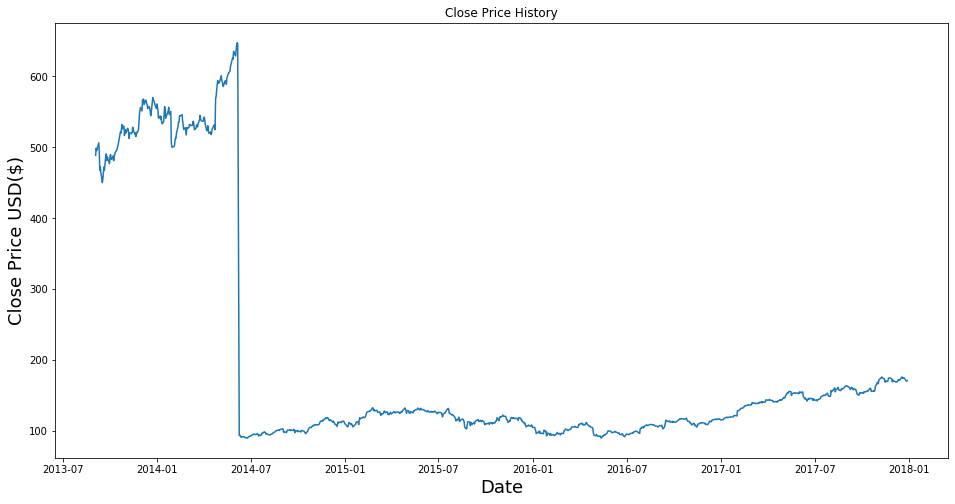

In [7]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel("Close Price USD($)",fontsize=18)
plt.show()

In [8]:
data.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.60,487.35,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0
2013-09-04,499.56,502.24,496.28,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0
2013-09-05,500.25,500.68,493.64,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0
2013-09-06,498.44,499.38,489.95,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0
2013-09-09,505.00,507.92,503.48,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0


In [9]:
data.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Dividend      0
Split         0
Adj_Open      0
Adj_High      0
Adj_Low       0
Adj_Close     0
Adj_Volume    0
dtype: int64

In [10]:
data['label']=data['Adj_Close'].shift(-1)

In [11]:
data['HL_PCT']=(data['Adj_High']-data['Adj_Low'])/data['Adj_Close']*100

In [12]:
data['PCT_change']=(data['Adj_Close']-data['Adj_Open'])/data['Adj_Open']*100

# Task : 2 Data Manipulation and Feature Engineering

In [13]:
df=data[['Adj_Close','PCT_change','HL_PCT','Adj_Volume','label']]

In [14]:
df.head()

,Adj_Close,PCT_change,HL_PCT,Adj_Volume,label
Date,,,,,
2013-09-03,15.476472,-0.916650,2.711941,331928800.0,15.796753
2013-09-04,15.796753,-0.173953,1.195129,345032800.0,15.688388
2013-09-05,15.688388,-0.995502,1.421447,236367600.0,15.781833
2013-09-06,15.781833,-0.044138,1.892738,359525600.0,16.033661
2013-09-09,16.033661,0.231683,0.877176,340687200.0,15.668432


In [15]:
df.shape

(1090, 5)

In [16]:
df['label'].isnull().sum()

1

In [17]:
df=df.dropna()

In [18]:
X = df.loc[:, ['Adj_Close', 'PCT_change', 'HL_PCT','Adj_Volume']].values

In [19]:
Y = df.loc[:, 'label'].values

In [20]:
X

array([[ 1.54764725e+01, -9.16649767e-01,  2.71194073e+00,
         3.31928800e+08],
       [ 1.57967529e+01, -1.73953079e-01,  1.19512885e+00,
         3.45032800e+08],
       [ 1.56883878e+01, -9.95502249e-01,  1.42144689e+00,
         2.36367600e+08],
       ...,
       [ 4.21016459e+01,  1.88916877e-01,  5.27969830e-01,
         6.53977760e+07],
       [ 4.10335280e+01, -1.34660422e-01,  1.05000879e+00,
         1.32742144e+08],
       [ 4.10407450e+01,  2.93944738e-01,  6.27198124e-01,
         8.59928520e+07]])

In [21]:
Y

array([15.79675289, 15.68838781, 15.78183329, ..., 41.03352802,
       41.04074503, 41.15621723])

# Task : 3 Build and Train your ML Model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [29]:
X = preprocessing.scale(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [31]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set.
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
ypred=reg.predict(X)

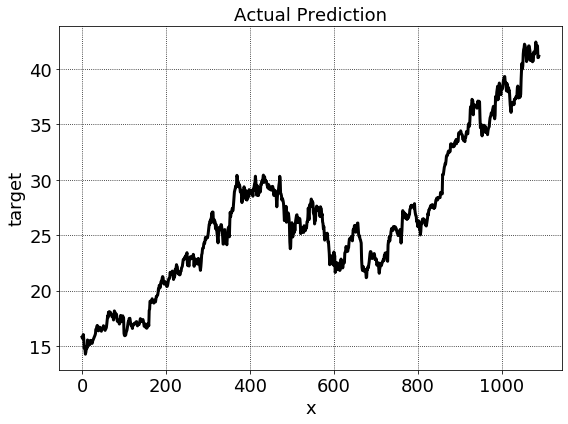

In [33]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6));

ax.plot(Y, color='black',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('x', fontsize = 18)
ax.set_ylabel('target', fontsize = 18)
ax.set_title("Actual Prediction",fontsize = 18)
fig.tight_layout()



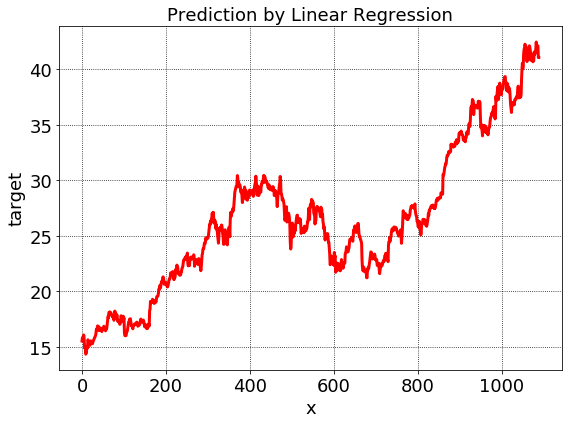

In [34]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6));

ax.plot(ypred, color='red',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('x', fontsize = 18)
ax.set_ylabel('target', fontsize = 18)
ax.set_title("Prediction by Linear Regression",fontsize = 18)
fig.tight_layout()




# Task : 4 Test Your Model

In [35]:
from sklearn import metrics

In [36]:
#mean_squared_error
metrics.mean_squared_error(Y,ypred)

0.13486992438822487